In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [4]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            hidden_dim: Number of nodes in the hidden layer
            output_dim: Number of classes
        """
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z2 = np.dot(X,self.W1) + self.bias1 #z2 1000X4
        a2 = np.tanh(z2) #1000X4
        z3 = np.dot(a2,self.W2) + self.bias2 #z3 1000X2
        exp_z3 = np.exp(z3) #1000X2
        softmax_scores = exp_z3 / (exp_z3 + 1) #a3 1000X2
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.W1) + self.bias1 #h ---> z2
        a2 = np.tanh(z2)
#         exp_h = np.exp(h)
#         hidden_scores = exp_h / (exp_h + 1) ----> a2
        z3 = np.dot(a2,self.W2) + self.bias2
        exp_z3 = np.exp(z3)
        softmax_scores = exp_z3 / (exp_z3 + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # TODO: implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01,L2_reg = 0.1):
    
        #Learns model parameters to fit the data.
#         X = a1 1000X2
#         W1 = 2X4
#         W2 = 4X2

        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.W1) + self.bias1 #z2 1000X4
            a2 = np.tanh(z2) #1000X4
            z3 = np.dot(a2,self.W2) + self.bias2 #z3 1000X2
            exp_z3 = np.exp(z3) #1000X2
            softmax_scores = exp_z3 / (exp_z3 + 1) #a3 1000X2
        
            # Backpropagation
            delta3 = np.zeros_like(softmax_scores) #1000X2
            one_hot_y = np.zeros_like(softmax_scores) #1000X2
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            delta3 = softmax_scores - one_hot_y #delta3 1000X2
            g_dash = 1-(np.power(a2,2))
            delta2 = np.multiply(np.dot(delta3,self.W2.T),g_dash) #delta2
            
            # Compute gradients of model parameters
            dW2 = np.dot(a2.T,delta3)
            dW1 = np.dot(X.T,delta2)
            dbias2 = np.sum(delta3, axis=0)
            dbias1 = np.sum(delta2, axis=0)

            # add L2 regularization
            dW2 += L2_reg * self.W2
            dW1 += L2_reg * self.W1
            
            # Gradient descent parameter update
            self.W2 -= alpha * dW2
            self.bias2 -= alpha * dbias2  
            self.W1 -= alpha * dW1
            self.bias1 -= alpha * dbias1   
        return 0

In [5]:
def plot_decision_boundary(model, X, y):
    """ 
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [6]:
#1. Load data
X = np.genfromtxt('P1_DATA/DATA/NonlinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('P1_DATA/DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
X[0:10]
# np.shape(X)[0]
# np.max(y) + 1

array([[ 1.78829982,  0.21578314],
       [ 1.82574187,  0.49508673],
       [ 0.4707481 ,  0.4049465 ],
       [-0.41050179,  1.28998652],
       [ 2.07030091, -0.15128293],
       [ 0.14160035, -0.38441494],
       [-0.45183733,  0.75348574],
       [ 0.18087846,  0.60768477],
       [-0.56307191,  0.92860876],
       [ 2.07283739,  0.26346446]])

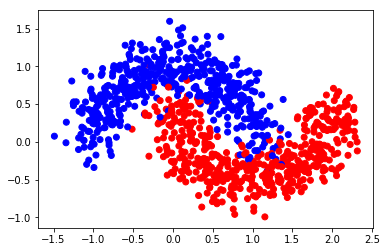

In [7]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [8]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 4
logreg = LogisticRegression(input_dim, hidden_dim, output_dim)

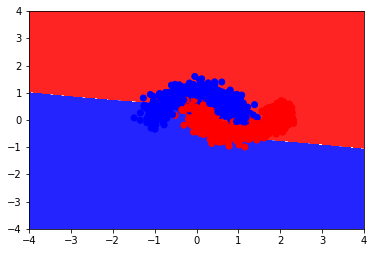

In [9]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [11]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001,L2_reg=0.01)

0

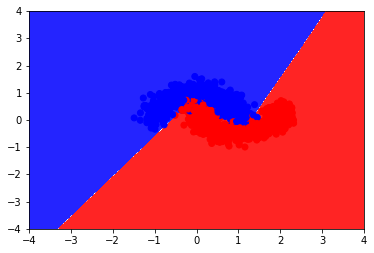

In [12]:
#6. Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

## Model Evaluation

In [13]:
#7. ompute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.966
CONFUSION MATRIX: 
 [[484.  18.]
 [ 16. 482.]]
